<a href="https://colab.research.google.com/github/thual/PBLClimate/blob/main/PCAin2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis for 2D fields
## Olivier THUAL, Toulouse INP, 08/02/2023


**Question 1.** Read the program below and execute it. Explore the level of the noise compared to the level of the coherent signal. Explain with texts and formulas.  

**Answer 1.**

*Write the answer here!*


# Subroutines

First run this first part of the program to set up the libraries and subroutines!

*  Colab : ⌘/Ctrl+F9 to execute all cells
*  MyBinder : -> Run -> "Run all cells"


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


print("PCA for 2D fields")

# Small tools

def zfi(x,le=2):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a
    
# Function Gifanim
# ================

def Gifanim(anifunc):
    global inter, fram
    ani=FuncAnimation(fig,anifunc,frames=fram,interval=inter,repeat=True)
    # Create an animated gif
    if FlagSavegif:
      namegif=name+".gif"
      print(" ")   
      print("Simulation to create an animated gif")  
      ani.save(namegif,writer="pillow")
      print("   Animated gif built:",namegif)
    # Visualisation animée de la simulation 
    print("Simulation to create the animation")
    print("==================================")
    plt.close() 
    plt.rc('animation', html='jshtml')
    return ani

 # Animations
 # ================================================

def Ani2Dfield(): 
    # Animation of a 2D field
    global fig, ax
    global name

    # Prepare the figure for the animation
    fig=plt.figure(1,figsize=(7,5))
    ax=plt.subplot(1,1,1)

    name="Animation 2D field"

    print(" ")   
    print("==================================")
    print(name)
    
    # Launch the animation
    ani=Gifanim(anisimple)      
    return ani

# Fonction d'animations appelées par FuncAnimation
# ================================================

def anisimple(i):
    # Animation simple
    global fig, ax
    global matA
    
    # time
    t=dt*i;

    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'$y$',fontsize=16)
    ax.set_title(title,fontsize=16)
    
    # Field : coherent plus noise
    Noise=anoise*np.random.normal(0,1,size=(Nx,Ny))
    Field1=a1*np.sin(kx*X)*np.sin(ky*Y)*np.cos(om1*t)
    Field2=a2*np.sin(kx*X)*np.sin(2*ky*Y)*np.cos(om2*t)
    Field=Field1+Field2+Noise

    # Contours   
    ax.contourf(X, Y, Field, levels=levels)
    CS=ax.contour(X, Y, Field, levels=levels,colors='k')
    ax.clabel(CS, fontsize=9, inline=True)


    # Update of the correlation matrix
    Fires=Field.reshape(NxNy,1)
    matA=matA+Fires@Fires.transpose()*usNxNym1

    # Save all figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        fig.savefig(namei)

# Plot of two modes
# ================================================

def Twomodes():

    Fi1=a1*np.sin(kx*X)*np.sin(ky*Y)
    Fi2=a2*np.sin(kx*X)*np.sin(2*ky*Y)

    # First mode
    fig, ax = plt.subplots()
    ax.contourf(X, Y, Fi1, levels=levels)
    CS=ax.contour(X, Y, Fi1, levels=levels,colors='k')
    ax.clabel(CS, fontsize=9, inline=True)        
    fig.savefig("Mode1.png") 
    plt.show()

    # Second mode
    fig, ax = plt.subplots()
    ax.contourf(X, Y, Fi2, levels=levels)
    CS=ax.contour(X, Y, Fi2, levels=levels,colors='k')
    ax.clabel(CS, fontsize=9, inline=True)        
    fig.savefig("Mode1.png") 
    plt.show()       

PCA for 2D fields


# Parameters to change

The following parameters can be changed:

*  `a1` : Level of the coherent signal
*  `anoise` : Level of the noise



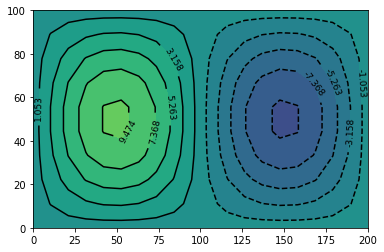

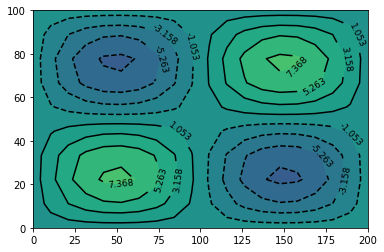

 
Animation 2D field
Simulation to create the animation


In [ ]:
global matA
F=False; T=True

# Parameters
a1=10; # Amplitude of the first coherent signal
a2=8; # Amplitude of the second coherent signal
anoise=1 # Amplitude of the noise
Nx=20; Ny=10  # Number of points
Lx=200; Ly=100 # Size of the domain
Nt=30 # Number of image separated by dt
lev=a1+10*anoise #  min and max of the contour levels
nlev=20; # Number of contour levels

# Choice parameters
Flaganim=T # To Launch this animation
Flag2modes=T # To plot the two modes
ext=".png" # Extension of the file to save
FlagSavext=T # One file for each image
FlagSavegif=F # Save an animated gif

# Time parameters
Tmax=10;
dt=Tmax/Nt  
om1=2*np.pi/Tmax
om2=1.5*om1

# Parameters not to change
inter=300; # millisecondes animation par défaut
levels = np.linspace(-lev,lev,nlev)

# Derived parameters
fram=np.arange(0,Nt) # Tableau pour l'animation des images
kx=2*np.pi/Lx
ky=np.pi/Ly
x=np.linspace(0,Lx,Nx)
y=np.linspace(0,Ly,Ny)
XT, YT = np.meshgrid(x, y)
X, Y=XT.transpose(), YT.transpose()
usNxNym1=1/(Nx*Ny-1)
NxNy=Nx*Ny


# Initialisation of the correlations matrix
matA=np.zeros((NxNy,NxNy))

# Plot of the two modes
if Flag2modes: Twomodes()
# Lancement de l'animation
ani="pas d'animation"   
if Flaganim: ani=Ani2Dfield()

# Animation 
# Cette commande doit rester la dernière pour être suivie d'effet
ani

# Principal component analysis 



**Question 2.** Read and execute the program below and explain the method.


**Answer 2.**

*Write the answer here!*


Reference:

*   Principal Component Analysis in $\mathbb R^2$, Jupyter notebook : https://colab.research.google.com/drive/



In [ ]:
# Spectrum
val, vect = np.linalg.eig(matA)
ea=np.sqrt(val)

# Eigenvalues

**Question 3.** Explain this plot.


**Answer 3.**

*Write the answer here!*


e1, e2 (18.710123727307376+0j) (14.584285642157736+0j)
ea [18.71012373 14.58428564  1.33032982  1.29545864  1.26026961  1.21895782
  1.20650946  1.16820752  1.12811681  1.09327379]


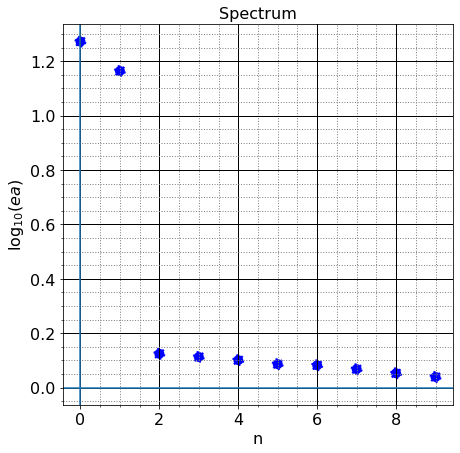

In [ ]:
# Init figure
plt.figure(1,figsize=(7,7))
ax=plt.subplot(1,1,1)  
plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
plt.minorticks_on()
plt.grid(which='minor',color='grey', axis='x', linestyle=':', linewidth=1)        
plt.grid(which='minor',color='grey', axis='y', linestyle=':', linewidth=1)        
plt.xticks(fontsize=16); plt.yticks(fontsize=16);  
plt.title("Spectrum",fontsize=16)
plt.axvline(0); plt.axhline(0)  
plt.xlabel("n",fontsize=16); plt.ylabel("$\log_{10}(ea)$",fontsize=16)

ear=np.real(ea)
nea=10
plt.scatter(range(nea),np.log10(ear[0:nea]),color='b',linestyle='dotted',linewidth=2,s=100)
print("e1, e2",ea[0],ea[1])
print("ea",np.real(ea[0:10]))

# First Eigenvectors


**Question 4.** Explain this plot.


**Answer 4.**

*Write the answer here!*

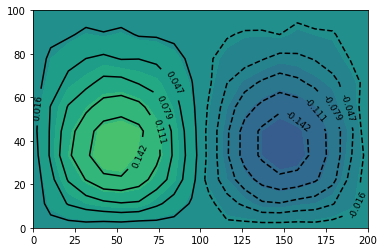

In [ ]:
# First EOF
phi1=np.real(vect[:,0]).reshape(Nx,Ny)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, phi1, levels=.3*a1*levels/NxNy,colors='k')
ax.clabel(CS, fontsize=9, inline=True)
ax.contourf(X, Y, phi1, levels=.02*levels)
plt.show()

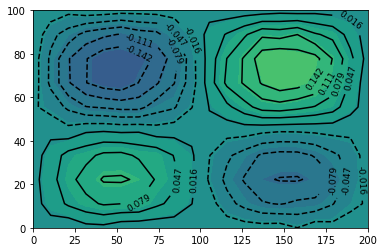

In [ ]:
# Second EOF
phi2=np.real(vect[:,1]).reshape(Nx,Ny)
fig, ax = plt.subplots()
CS=ax.contour(X, Y, phi2, levels=.3*a1*levels/NxNy,colors='k')
ax.clabel(CS, fontsize=9, inline=True)
ax.contourf(X, Y, phi2, levels=.02*levels)
plt.show()

# Signal reconstruction

**Question 5.** Write a program which project the time evolving 2D fields on the first EOF and build an animation of this projection. 


**Answer 5.**

*Write the program below and execute it!*